# Банки — Сегментация пользователей по потреблению

# Материалы
* [Презентация](https://disk.yandex.ru/i/PERaTh4jVi-O0Q)

* [Дашборд](https://public.tableau.com/app/profile/grigorii.fedkushov/viz/banks_yarik/Dashboard1)

## Описание проекта.

В нашем распоряжении датасет bank_scrooge.csv, который содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Заказчик исследования - менеджер продукта, которому необходимо оценить поведение пользователей для разработки новых продуктов и минимизации оттока.

**Цель исследования :**  
- минимизация оттока клиентов банка на основе анализа их поведения,
- сегментация пользователей по потреблению,
- проверка гипотез о различии дохода между клиентами, которые пользуются двумя продуктами банка и теми, которые пользуются одним, а также между клиентами Рыбинска и Ростова  

**Ход исследования:**  

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

**Таким образом, исследование пройдёт в несколько этапов:**

1. Обзор данных.  

2. Предобработка данных.  

3. Исследовательский анализ данных:  
- общее распределение признаков клиентов банка
- матрица корреляций
- распределение признаков относительно оттока клиентов
- распределение признаков в разрезе филиалов
- распределение признаков в разрезе количества потребляемых продуктов

4. Проверка гипотез:

- о различии возраста между клиентами, которые пользуются двумя продуктами банка и теми, которые пользуются одним
-  о различие в скоринговых баллах действующих и ушедших клиентов банка 

5. Выводы и рекомендации

## Обзор данных

Импортируем необходимые библиотеки, загружаем данные в переменные.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#вывод значений без сокращений
pd.set_option('display.max_colwidth', -1)

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
df.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


In [4]:
# выведем на экран информацию о датасете и о типе данных в каждом столбце:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
# количество пропусков 
df.isnull().sum()

USERID           0   
score            0   
city             0   
gender           0   
age              26  
equity           0   
balance          2295
products         0   
credit_card      0   
last_activity    0   
EST_SALARY       0   
churn            0   
dtype: int64

### Вывод по обзору

В представленном для анализа файле 10000 строк с данными клиентов банка.

Таблица содержит 12 столбцов:

- USERID — идентификатор пользователя,  
- score — баллы кредитного скоринга,  
- city — город,  
- gender — пол,  
- age — возраст,  
- equity — приблизительная оценка собственности клиента,  
- balance — баланс на счёте,  
- products — количество продуктов, которыми пользуется клиент,  
- credit_card — есть ли кредитная карта  
- last_activity — был ли клиент активный в последнее время,  
- EST_SALARY — оценочная заработная плата клиента,  
- churn — признак оттока: ушёл или нет    

В поле balance -2295 пропусков данных, что составляет около 23% от общего количества данных.  
В поле age -26 пропусков данных, что составляет всего 0,3% от общего количества данных, удаление не повлияет на результаты.

Tип данных в столбцах age не корректен 

На этапе предобработки выполним следующее:  
- исправим нарушения стиля (приведем к snacke_case и заменим прописные буквы в наименованиях столбцов на строчные);

- заменим значения стоблца Gender с "Ж" на 0, с "М" на 1;  
- заменим тип данных поля age
- удалим строки с пропусками солбца age  

- проанализируем столбец balance для принятия решения о работе с пропусками данных.

- проверим данные на дубликаты.

- проверка аномалий и выбросов

## Предобработка данных

### Приведение наименований столбцов файлов к единому стилю

In [6]:
# приведем названия столбцов к нижнему и "змеиному" регистрам:
df = df.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Замена значений столбца gender

Для дальнейшего анализа нам необходимо перевести категориальные значения в бинарные.

In [7]:
#замена значений "М" на 1, "Ж" на 0:
#df.loc[df['gender']=='М', 'gender'] = 1
#df.loc[df['gender']=='Ж','gender'] = 0

In [8]:
#приведем к типу данных int:
#df['gender'] = df['gender'].astype(int)

In [9]:
df['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

Клиентов мужчин и женщин поровну. 

### Удаление строк с пропусками солбца age

In [10]:
df = df.dropna(subset=['age']).reset_index(drop=True)

In [11]:
#приведем к типу данных int:
df['age'] = df['age'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 896.2+ KB


### Анализ пропусков столбца balance

Пропусков достаточно много (более 20%), поэтому удалять их было бы некорректно. Можно заменить средним или медианой, однако это может повлиять на результаты дальнейшего анализа, поэтому попробуем исследовать природу этих пропусков.

Распределение пропусков данных по филиалам:

In [13]:
df.query('balance.isna()').groupby('city')['city'].count()

city
Ростов       235 
Рыбинск      586 
Ярославль    1458
Name: city, dtype: int64

Пропуски есть во всех филиалах.

Возможно пропуски зависят от того ушёл клиент или нет?

In [14]:
#группируем строки с пропусками по значениям оттока (0/1)
df.query('balance.isna()').groupby('churn')['churn'].count()

churn
0    2266
1    13  
Name: churn, dtype: int64

Как мы видим, лишь в 13 случаях пропуск мог быть связан с тем, что клиент ушел из банка, так что гипотеза о том, что пропуски связаны с оттоком, не подтвердилась.

In [15]:
#распределение среднего остатка по признаку оттока
df.groupby('churn').agg({'balance' : ['count', 'mean']})

balance             
        count         mean
churn                     
0      5889   733,031.63  
1      1806   1,134,458.21

В строках с пропусками значений есть клиенты как ушедшие, так и оставшиеся в банке.  
Наличие/отсутствие остатка не связано churn=1, то есть пропуск не является признаком оттока.

In [16]:
#проверяем, есть ли нулевые остатки в поле `balance`
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3896,179831,730.00,Ярославль,М,18,0,0.00,2,1,1,"64,548.33",0
6750,148456,813.00,Ярославль,М,20,2,0.00,2,1,0,"23,876.51",0


Нулевых остатков в датасете всего 2, что косвенно подтверждает предположение о том, что пропуски- это нулевые значения

Посмотрим, верно ли, что в основном пропуски связанны с тем, что клиент пользуется кредитной картой:

In [17]:
df.groupby('credit_card')['balance'].apply(lambda x: x.isna().sum())

credit_card
0    421 
1    1858
Name: balance, dtype: int64

In [18]:
df['credit_card'].value_counts()

1    6784
0    3190
Name: credit_card, dtype: int64

Посмотрим на количество продуктов.

In [19]:
df.groupby('products')['balance'].apply(lambda x: x.isna().sum())

products
0    1   
1    1934
2    315 
3    29  
4    0   
5    0   
Name: balance, dtype: int64

In [20]:
df['products'].value_counts()

2    5119
1    3323
3    1038
4    474 
5    19  
0    1   
Name: products, dtype: int64

<div class="alert alert-info"><b>Комментарий студента:</b> Больше всего пропусков у тех, кто использует 1 продукт - 1934. Проверим, соответсвуют ли они держателям кредиток 

In [21]:
df_na = df.copy()
df_na['nan'] = np.where(df.balance.isna(), 1, 0)
df_na.query('nan == 1 & credit_card == 1 & products == 1')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,nan
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,1
10,148929,927.00,Ростов,М,52,0,NaN,1,1,1,"196,820.07",0,1
11,172184,921.00,Ростов,М,41,0,NaN,1,1,1,"217,469.48",0,1
39,173175,924.00,Рыбинск,Ж,51,0,NaN,1,1,1,"248,844.47",0,1
43,228585,956.00,Ростов,М,41,0,NaN,1,1,0,"115,117.10",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9940,120996,908.00,Рыбинск,Ж,68,0,NaN,1,1,1,"146,253.81",0,1
9948,160702,919.00,Рыбинск,М,26,0,NaN,1,1,1,"187,423.66",0,1
9958,125941,729.00,Ярославль,Ж,42,0,NaN,1,1,1,"687,538.70",0,1
9967,219924,884.00,Рыбинск,Ж,36,0,NaN,1,1,1,"169,844.88",0,1


1934 из 2295 пропусков принадлежит клиентам с одним продуктом, 1585 из которых кредитка.

Взглянем на строку c 0 продуктов:

In [22]:
df[df['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8939,147837,962.00,Рыбинск,Ж,79,3,NaN,0,0,0,"25,063.96",1


Судя по всему, 0 в столбце products появился потому что этот клиент ушел из банка и теперь действительно больше не пользуется банковскими продуктами.

In [23]:
 #Удалим строки с выбросами клиент без продукта:
df = df[df['products']>0] 

**Вывод**  
Скорее всего все пропущенные значения означают нулевой баланс. Не возможно представить себе ситуацию, чтобы банк не имел данных об остатке денег на счету клиента, , поэтому заменим пропуски на 0.

In [24]:
#df['balance'] = df['balance'].fillna(0)

### Проверка на дубликаты

In [25]:
# найдем  количестве полных дубликатов в датасете:
print(
    'Количество дубликатов:', df.duplicated().sum()
)

Количество дубликатов: 0


Также мы можем отдельно проверить на наличие дубликатов столбцы, где все значения должны быть уникальными (в нашем случае это столбец user_id).

In [26]:
print (df['user_id'].duplicated().sum())

50


Видим дубликаты, возможно из-за того что данные сборные из разных филиалов, и user_id может задваиваться

Проверим записи на задвоение предварительно убрав user_id:

In [27]:
if df.drop('user_id', axis=1).duplicated().sum() == 0:
    print('Дубликаты не обнаружены')
else:
    print(f'Обнаружено дубликатов:{df.drop("user_id", axis=1).duplicated().sum()}')

Дубликаты не обнаружены


Т.к. данные не повторяются оставим их без изменений

Также осуществим проверку на неявные дубликаты в столбцах с категориальными переменными:

In [28]:
# проверим уникальные значения в столбце city

df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [29]:
# проверим уникальные значения в столбце gender:

df['gender'].unique()

array(['Ж', 'М'], dtype=object)

Все в порядке. Теперь проверим столбцы с бинарными значениями 0 и 1:

In [30]:
# проверим уникальные значения в столбце credit_card:

df['credit_card'].unique()

array([0, 1], dtype=int64)

In [31]:
# проверим уникальные значения в столбце last_activity:

df['last_activity'].unique()

array([1, 0], dtype=int64)

In [32]:
# проверим уникальные значения в столбце churn:

df['churn'].unique()

array([1, 0], dtype=int64)

Всё ок.

### Проверка аномалий и выбросов

In [33]:
# применим метод describe для оценки разброса данных в столбцах датасета:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"9,973.00","9,973.00","9,973.00","9,973.00","7,695.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00"
mean,"171,757.62",848.67,42.73,2.63,"827,245.59",1.87,0.68,0.52,"147,799.12",0.18
std,"33,696.37",65.39,12.18,1.98,"1,980,327.41",0.79,0.47,0.50,"139,287.08",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00
25%,"142,757.00",802.00,33.00,0.00,"295,698.71",1.00,0.00,0.00,"75,252.02",0.00
50%,"172,651.00",853.00,40.00,3.00,"524,295.33",2.00,1.00,1.00,"119,643.06",0.00
75%,"201,164.00",900.00,51.00,4.00,"980,051.21",2.00,1.00,1.00,"174,499.96",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


Мы видим, что в большинстве столбцов данные нормально распределены: среднее отличается от медианы незначительно, а стандартное отклонение невелико.  
Однако дополнительно проверим значения в столбце est_salary: в таблице видно, что минимальное значение существенно ниже МРОТ в Ярославской области, из открытых источников размер его с 1 января 2023, руб.:16242.   


In [34]:
# Посчитаем строки с клиентами, заработная плата которых ниже МРОТ:
df[df['est_salary']<16000]['user_id'].count()

70

70 клиентов с доходом ниже МРОТ, это не много. Стоит учесть, что данные о доходе могут быть недостоверные, плюс в доход может считаться не только зарплата, но и соцвыплаты (пенсия/стипендия) или проценты по вкладам. Оставим эти данные как есть.

<div class="alert alert-info"><b>Комментарий студента3: Так же видим аномально высокие макс. значения в полях est_salary и balance, рассмотрим их:</b> </div>

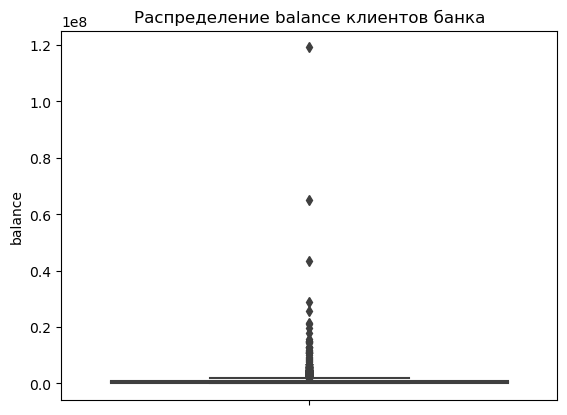

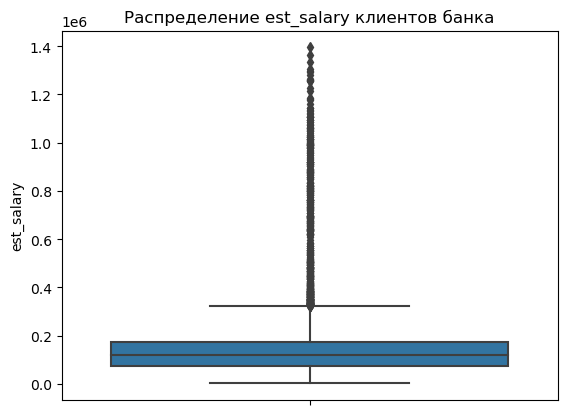

In [35]:
for column in [ 'balance', 'est_salary']:
    sns.boxplot(
         y = df[column], data = df).set(
         title=(f'Распределение {column} клиентов банка'))
    plt.show()

На боксплоте видим много выбросов с аномально высокими доходами и балансом. Возможно это клиенты с сверхбольшим доходом и накоплениями, убирать таких клиентов из датасета не будем, но при анализе данных по доходу и балансу разделим клиентов на 2 категории: премиум и нормальная. Определим границы разделения:

In [36]:
df_normal = df.query('est_salary < 260000 & balance < 1650000')

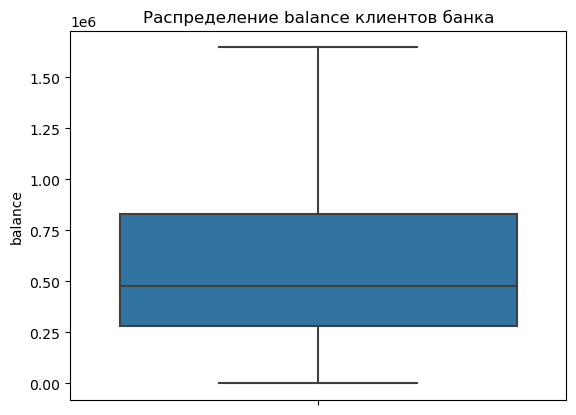

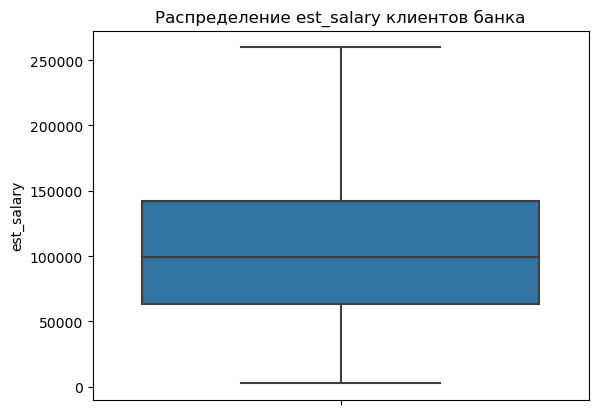

In [37]:
for column in [ 'balance', 'est_salary']:
    sns.boxplot(
         y = df_normal[column], data = df_normal).set(
         title=(f'Распределение {column} клиентов банка'))
    plt.show()

Выбросы отсутствуют. Границы для категорий определены.

In [38]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [39]:
df.shape[0] / data.shape[0] 

0.9973

### Вывод по разделу 

В результате предобработки данных:

- наименования столбцов приведены к общему стилю
- проведена замена значений поля gender с "М" на 1 и с "Ж" на 0
- т.к. пропусков менее 1 % удалены строки с пропусками в поле age
- пропуски данных поля balance оставлены без изменений

Данные готовы к дальнейшему анализу.


## Исследовательский анализ данных 

### Общее распределение признаков относительно оттока клиентов

In [40]:
churn_group = df.groupby('churn')['churn'].count()
churn_group.columns = ['churn_cnt']
churn_group

churn
0    8155
1    1818
Name: churn, dtype: int64

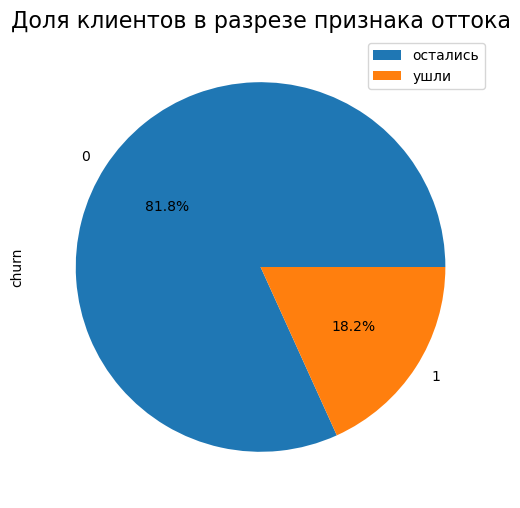

In [41]:
#строим круговую диаграмму
churn_group.plot(kind = 'pie', y ='churn_cnt', autopct='%1.1f%%', figsize= (6,6),
                       );
plt.title('Доля клиентов в разрезе признака оттока', fontsize = 16)
plt.legend(['остались', 'ушли'])
plt.show()

Посмотрим на средние и медианные признаки клиентов по статусу оттока:

In [42]:
df.drop('user_id', axis=1).groupby(by='churn').agg(
       ['mean', 'median']).T.round(2)

churn                         0            1
score         mean   845.40     863.36      
              median 848.00     866.00      
age           mean   43.02      41.43       
              median 40.00      39.00       
equity        mean   2.38       3.76        
              median 3.00       4.00        
balance       mean   733,031.63 1,134,458.21
              median 475,410.09 783,908.90  
products      mean   1.76       2.38        
              median 2.00       2.00        
credit_card   mean   0.71       0.55        
              median 1.00       1.00        
last_activity mean   0.48       0.70        
              median 0.00       1.00        
est_salary    mean   147,674.64 148,357.48  
              median 118,227.60 125,408.88

Что видим по средним:  

срединий скоринговый балл слабо отличается  
средний возраст оcтавшихся клиентов чуть выше  
оценка недвижимости больше у отточных   
разница в количестве денег на счету существенная, баланс выше у отточных  
среднее количество используемых продуктов банка так же выше у ушедших  
наличие кредитки чаще встречается у оставшихся 
у клиентов оттока выше показатель активности 
уровень дохода практически одинаковый  

В целом картина на первый взгляд пародоксальная:  
отточные клиенты более активные состоятельные люди, имеющие высокий баланс и оценку недвижимости, не имеющие кредитку

#### Матрица корреляций

Проанализируем, как отток клиентов коррелирует с другими параметрами, представленными в датафрейме:

Закодируем категориальные признаки gender и city для определения корреляции 

In [43]:
df['gender_2']=df['gender']
df['city_2']=df['city']
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_2,city_2
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,Ж,Рыбинск
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,Ж,Рыбинск
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,Ж,Рыбинск
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,Ж,Ярославль
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,М,Ярославль


In [44]:
# закодируем данные в gender_2 и city_2:
df = pd.get_dummies(df, columns =['city_2', 'gender_2'])
df = df.rename (
    columns = ({
        'city_2_Ростов':'rostov', 'city_2_Рыбинск':'rybinsk','city_2_Ярославль':'yarolslavl', 
        'gender_2_Ж':'female', 'gender_2_М':'male'}))
display (df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yarolslavl,female,male
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0,1,0,1,0
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,1,1,0
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,0,0,1,0,1


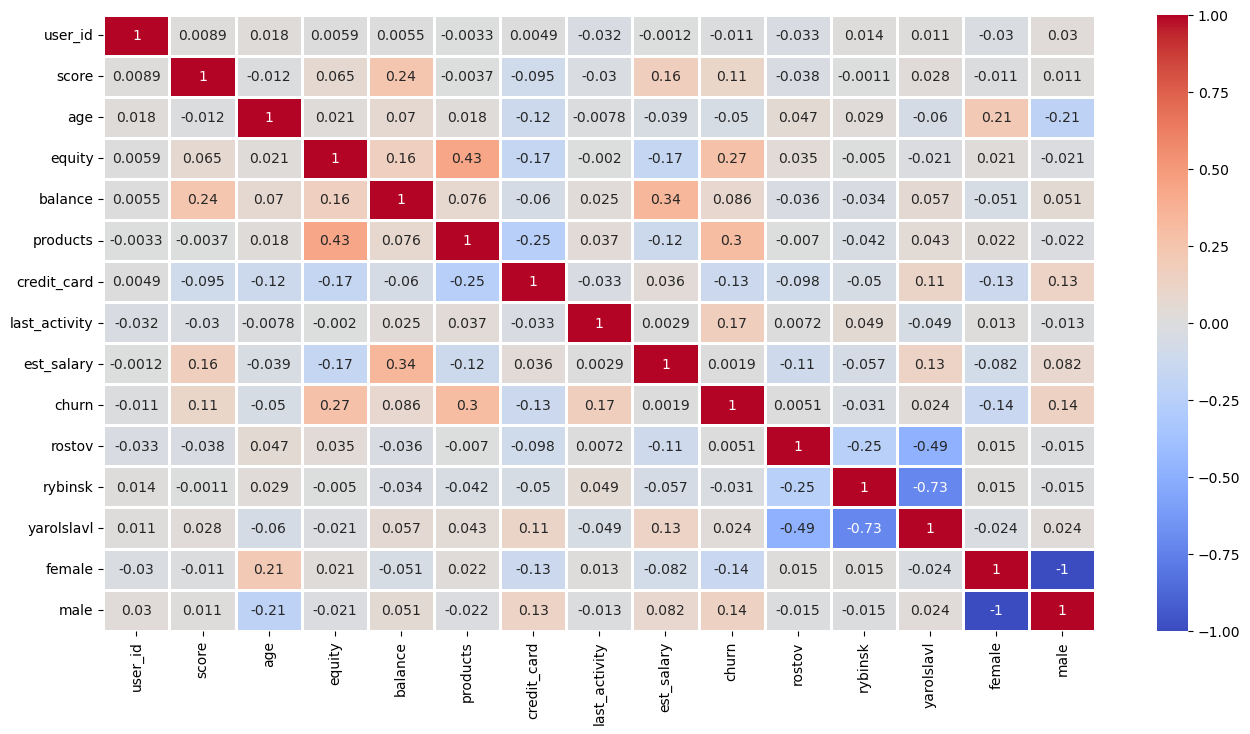

In [45]:
# построим тепловую карту:
plt.figure(figsize=(16,8))
sns.heatmap (df.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1);

Оценка силы связи:  
слабая — от 0,1 до 0,3;  
умеренная — от 0,3 до 0,5;  
заметная — от 0,5 до 0,7;  
высокая — от 0,7 до 0,9;  
весьма высокая (сильная) — от 0,9 до 1,0.

##### Вывод

По таблице видно что связь между показателями слабая, наибольшая корреляция с показателем оттока клиентов у таких параметров как:

оценка объектов собственности клиента (столбец equity),  
скоринговый рейтинг клиента (столбец score),  
количество продуктов, которыми пользуется клиент (столбец products),  
наличие кредитной карты (столбец credit_card),  
активность пользователя (столбец last_activity),  
пол пользователя (столбцы female и male),  


Рассмотрим эти параметры по отдельности.

#### Приблизительная оценка собственности клиента

,sum,count,perc
equity,,,
0,90,2576,3.49
1,93,773,12.03
2,166,1051,15.79
3,321,1540,20.84
4,464,1847,25.12
5,576,1915,30.08
6,58,161,36.02
7,37,80,46.25
8,6,17,35.29


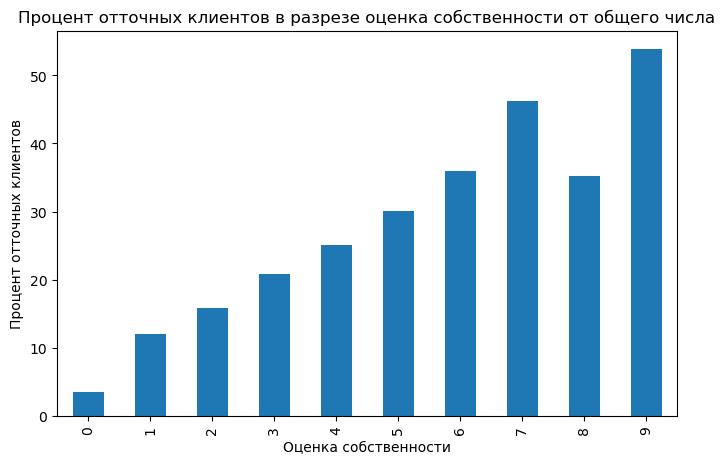

In [46]:
#Процент отточных клиентов в разрезе оценка собственности от общего числа:
eq_churn = df.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
eq_churn.columns = eq_churn.columns.droplevel(level=1)
eq_churn ['perc'] = eq_churn['sum']/eq_churn['count']*100

# Построим столбчатую диаграмму:
eq_churn['perc'].plot (
    kind='bar', title = 'Процент отточных клиентов в разрезе оценка собственности от общего числа',
    xlabel = 'Оценка собственности', ylabel = 'Процент отточных клиентов', figsize = (8,5));
eq_churn

Наблюдается прямая зависимость - чем выше оценка собственности, тем больше процент отточных клиентов (от 4% для оценки 0 до  55% для оценки 9)

#### Баллы кредитного скоринга

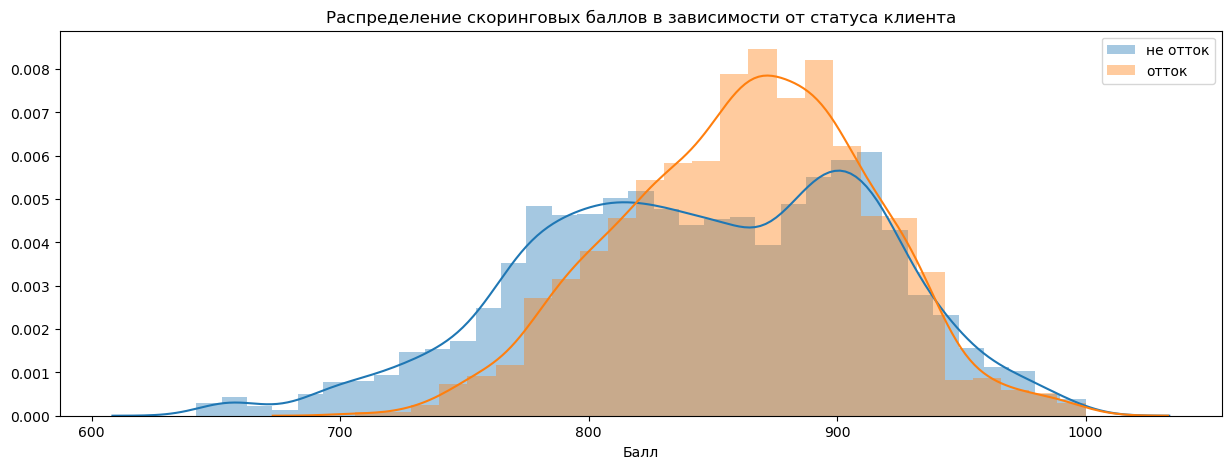

In [47]:
plt.figure(figsize=(15, 5))

sns.distplot(df[df['churn'] == 0]['score'],  label = 'не отток')
sns.distplot(df[df['churn'] == 1]['score'], label = 'отток')

plt.title('Распределение скоринговых баллов в зависимости от статуса клиента')
plt.xlabel('Балл')
plt.ylabel('')
plt.legend()
plt.show()

Из графика можно сделать вывод что клиенты со скоринговым баллом от 820-950 больше склонны к оттоку

#### Количество продуктов, которыми пользуется клиент

,sum,count,perc
products,,,
1,235,3323,7.07
2,978,5119,19.11
3,297,1038,28.61
4,300,474,63.29
5,8,19,42.11


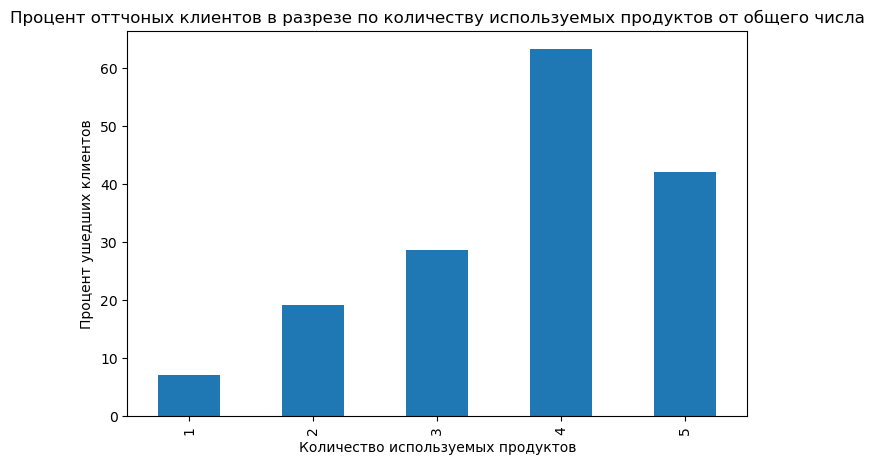

In [48]:
# Рассчитаем процент оттчоных клиентов в разрезе по количеству используемых продуктов от общего числа:
pro_churn = df.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
pro_churn.columns = pro_churn.columns.droplevel(level=1)
pro_churn ['perc'] = pro_churn['sum']/pro_churn['count']*100

# Построим столбчатую диаграмму:
pro_churn['perc'].plot (
    kind='bar', title = 'Процент оттчоных клиентов в разрезе по количеству используемых продуктов от общего числа',
    xlabel = 'Количество используемых продуктов', ylabel = 'Процент ушедших клиентов', figsize = (8,5), 
    );
pro_churn

Наблюдается практически прямая зависимость. На графике видно, что 64% клиентов, использовавших 4 продукта, ушли из банка. На втором месте по отточности клиенты с 5 продуктами - 42%. Среди клиентов, использовавших 2,3 продукта доля отточных находится в диапазоне 19-29%, для клиентов, использовавших 1 продукт - не превышает 8%.

#### Наличие кредитной карты

,sum,count,perc
credit_card,,,
0,815,3189,25.56
1,1003,6784,14.78


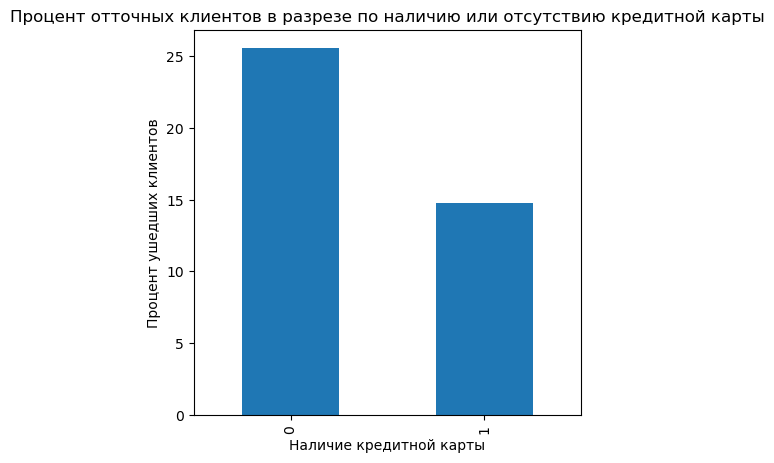

In [49]:
# Рассчитаем процент отточных клиентов в разрезе по наличию или отсутствию кредитной карты:
credit_card_churn = df.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_card_churn.columns = credit_card_churn.columns.droplevel(level=1)
credit_card_churn ['perc'] = credit_card_churn['sum']/credit_card_churn['count']*100

# Построим столбчатую диаграмму:
credit_card_churn['perc'].plot(
    kind='bar', figsize = (5,5), xlabel = 'Наличие кредитной карты',
    title = 'Процент отточных клиентов в разрезе по наличию или отсутствию кредитной карты',
    ylabel = 'Процент ушедших клиентов');

credit_card_churn

Клиенты, у которых была кредитная карта, уходили в  2 раза меньше, чем те, которые не пользовались кредитной картой.

#### Активность клиента в последнее время

,sum,count,perc
last_activity,,,
0,541,4758,11.37
1,1277,5215,24.49


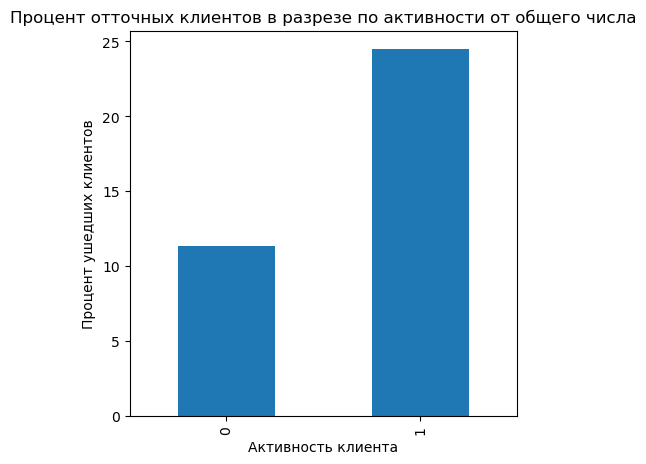

In [50]:
# Рассчитаем процент оттточных клиентов в разрезе по активности от общего числа:
activ_churn = df.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
activ_churn.columns = activ_churn.columns.droplevel(level=1)
activ_churn ['perc'] = activ_churn['sum']/activ_churn['count']*100

# Построим столбчатую диаграмму:

activ_churn['perc'].plot(
    kind='bar', title = 'Процент отточных клиентов в разрезе по активности от общего числа', figsize = (5,5), 
    ylabel = 'Процент ушедших клиентов', xlabel = 'Активность клиента');

activ_churn

У активных клиентов риск оттока в более чем 2 раза больше, чем у неактивных. Возможно это связано с тем, что активное использование банковских продуктов повышает вероятность в том числе негативного опыта от взаимодействия с банком, и, как следствие - принятию решения об отказе от услуг этого конкретного банка.

#### Гендер

,sum,count,perc
gender,,,
Ж,635,4982,12.75
М,1183,4991,23.70


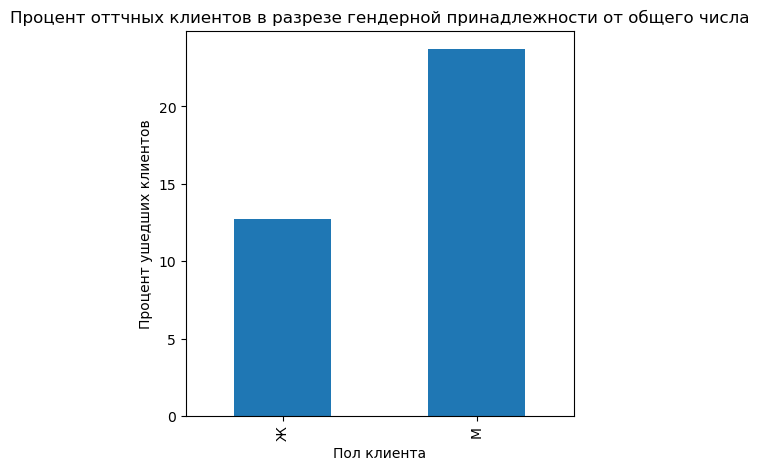

In [51]:
# Рассчитаем процент оттчных клиентов в разрезе гендерной принадлежности от общего числа:
gender_churn = df.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['perc'] = gender_churn['sum']/gender_churn['count']*100

# Построим столбчатую диаграмму:
colors = ['cornflowerblue', 'lightsalmon']
mylabels = ['Не были активны','Были активны']
gender_churn['perc'].plot(
    kind='bar', title = 'Процент оттчных клиентов в разрезе гендерной принадлежности от общего числа', figsize = (5,5), 
    xlabel = 'Пол клиента', ylabel = 'Процент ушедших клиентов');

gender_churn

Среди женщин доля отточных клиентов почти в два раз ниже, чем среди мужчин.

#### Возраст пользователей

Для возраста выполним категоризацию - разделим пользователей на группы для сравнения в дальнейшем по возрастным группам.

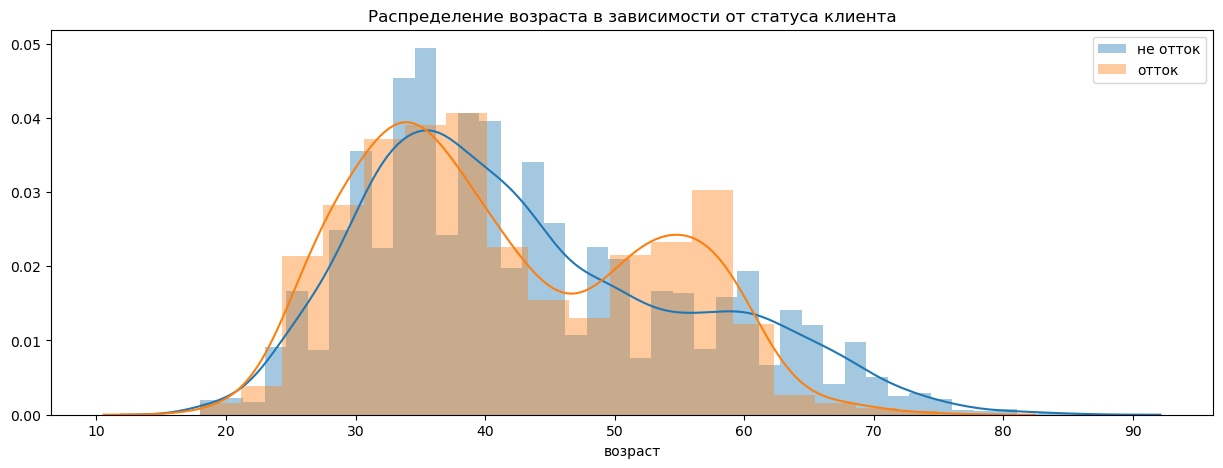

In [52]:
plt.figure(figsize=(15, 5))

sns.distplot(df[df['churn'] == 0]['age'],  label = 'не отток')
sns.distplot(df[df['churn'] == 1]['age'], label = 'отток')

plt.title('Распределение возраста в зависимости от статуса клиента')
plt.xlabel('возраст')
plt.ylabel('')
plt.legend()
plt.show()

Мы можем выделить возрастные группы с пользователями, имеющим схожие паттерны оттока, выполним категоризацию:  
от 22 до 35 лет;  
от 36-48 лет;  
от 49-62 лет;  
63 года и старше  

In [53]:
# функцию age_group для категоризации клиентов по возрастным группам:
def age_group(age):
    if 21 >= age >= 18:
        return '18-21'
    if 35 >= age >= 22:
        return '22-35'
    if 48 >= age >= 36:
        return '36-48'
    if 62 >= age >= 49:
        return '49-62'
    if 63 <= age:
        return '63+' 

In [54]:
# применим функцию age_group и добавим новый столбец
df['age_group'] = df['age'].apply (age_group)
display (df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yarolslavl,female,male,age_group
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0,1,0,22-35
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,0,1,0,1,0,36-48
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0,1,0,1,0,22-35
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,1,1,0,49-62
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,0,0,1,0,1,22-35


,sum,count,perc
age_group,,,
18-21,9,67,13.43
22-35,687,3224,21.31
36-48,557,3696,15.07
49-62,533,2207,24.15
63+,32,779,4.11


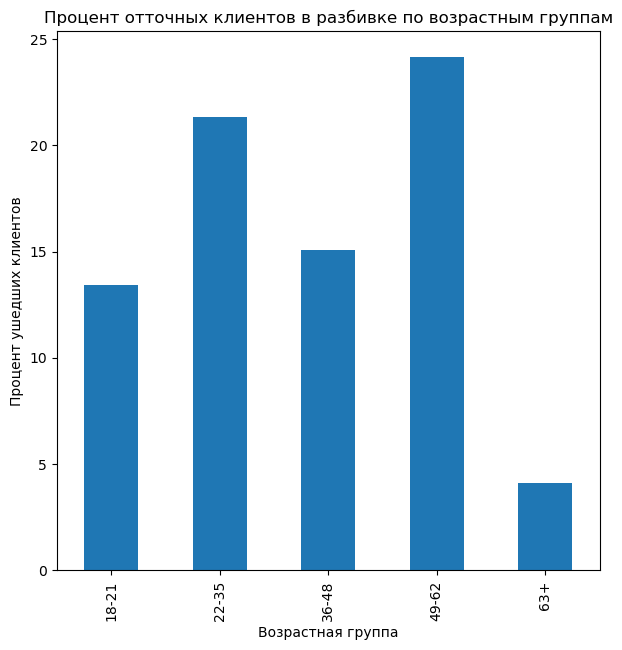

In [55]:
# Рассчитаем процент оттчоных клиентов в разбивке по возрастным группам от общего числа:
age_churn = df.pivot_table (index = 'age_group', values = 'churn', aggfunc =['sum', 'count'])
age_churn.columns = age_churn.columns.droplevel(level=1)
age_churn ['perc'] = age_churn['sum']/age_churn['count']*100

# Построим столбчатую диаграмму:
age_churn['perc'].plot (
    kind='bar', title = 'Процент отточных клиентов в разбивке по возрастным группам',
    xlabel = 'Возрастная группа', ylabel = 'Процент ушедших клиентов', figsize = (7,7) 
    );
age_churn

Пользователи в возрасте от 49 до 62 лет лидер по оттоку - среди них 24% отточных. Чуть меньше 21% оттока у возрастной группы 22-35 лет. Минимальный показатель у пользователей старше 63 лет - отточных всего 4%.

#### Город в котором располагается филиал

На графики корреляции не было выявлено зависимости между городом и оттоком клиентов.
Проверим это дополнительно.

,sum,count,perc
city,,,
Ростов,265,1416,18.71
Рыбинск,436,2682,16.26
Ярославль,1117,5875,19.01


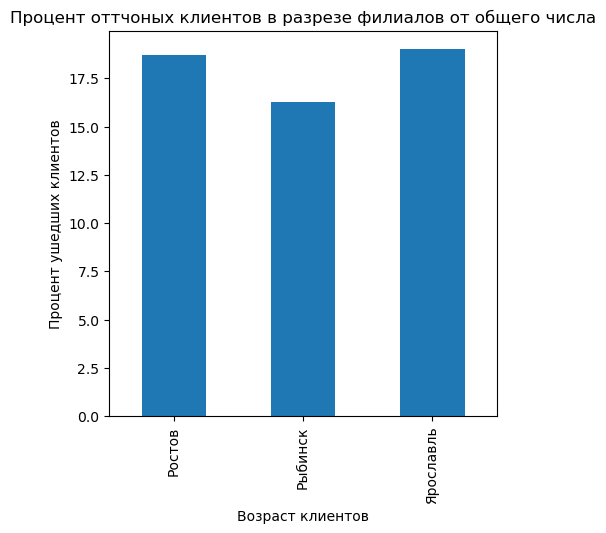

In [56]:
# Рассчитаем процент оттчоных клиентов в разрезе филиалов от общего числа:
city_churn = df.pivot_table (index = 'city', values = 'churn', aggfunc =['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100

# Построим столбчатую диаграмму:
city_churn['perc'].plot (
    kind='bar', title = 'Процент оттчоных клиентов в разрезе филиалов от общего числа',
    xlabel = 'Возраст клиентов', ylabel = 'Процент ушедших клиентов', figsize = (5,5)
    );
city_churn

Подтверждается ранее выявленный факт что различие в доле отточных клиентов между городами незначительное.Отток клиентов между городами происходит равномерно.

#### Баланс и доход

**Рассмотрим клиентов по балансовым группам:**

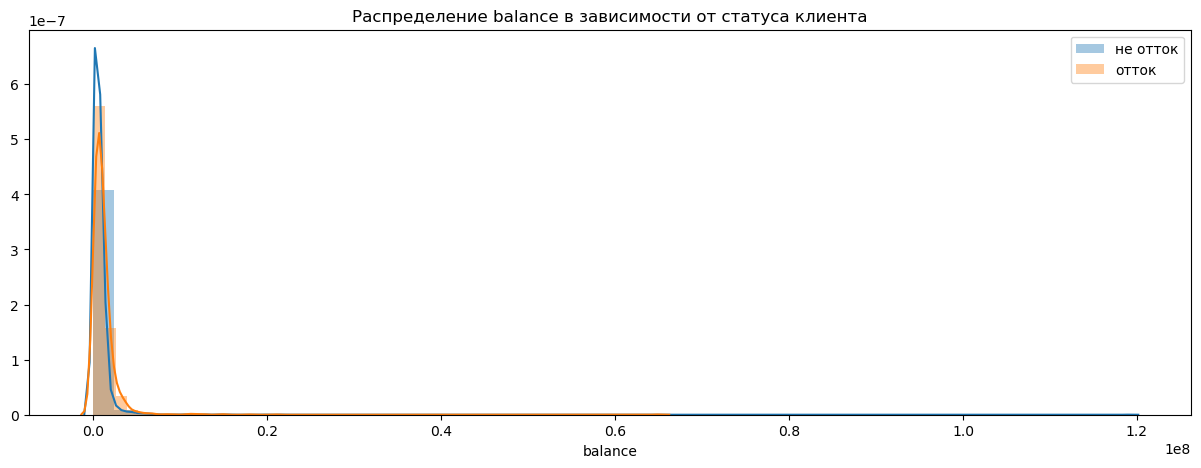

In [57]:
plt.figure(figsize=(15, 5))

sns.distplot(df[df['churn'] == 0]['balance'],  label = 'не отток')
sns.distplot(df[df['churn'] == 1]['balance'], label = 'отток')

plt.title('Распределение balance в зависимости от статуса клиента')
plt.xlabel('balance')
plt.ylabel('')
plt.legend()
plt.show()

Рассмотрим распределение по очищенным данным:

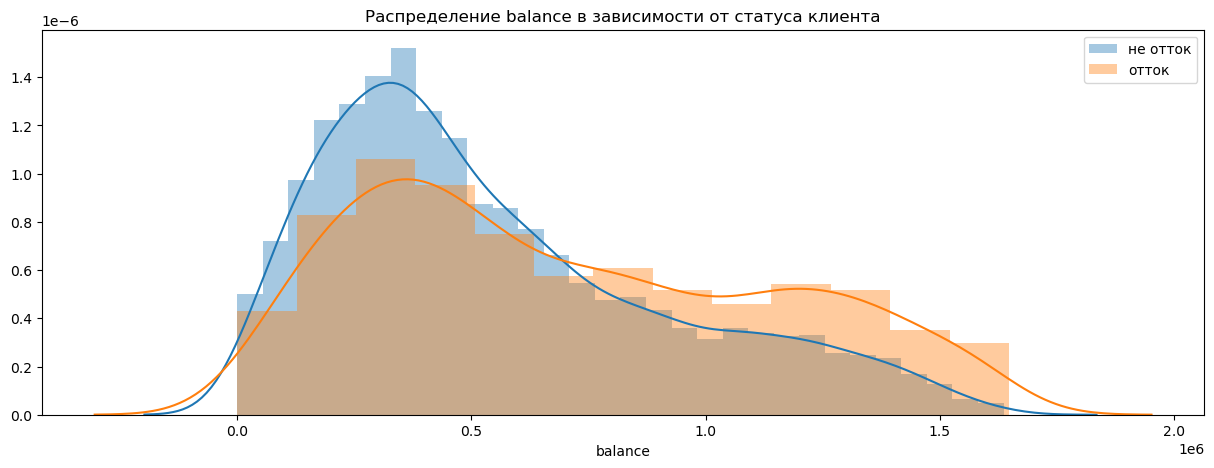

In [58]:
plt.figure(figsize=(15, 5))

sns.distplot(df_normal[df_normal['churn'] == 0]['balance'],  label = 'не отток')
sns.distplot(df_normal[df_normal['churn'] == 1]['balance'], label = 'отток')

plt.title('Распределение balance в зависимости от статуса клиента')
plt.xlabel('balance')
plt.ylabel('')
plt.legend()
plt.show()

Для балансового остатка выполним категоризацию - разделим пользователей на группы для сравнения в дальнейшем по группам.

In [59]:
# функция balance_group для категоризации клиентов по балансу:
def balance_group(balance):
    if 750000 >= balance >= 0:
        return '0-750к'
    if 1650000 >= balance >= 750001:
        return '750к-1650к'
    if balance >= 1650001:
        return '1650к+'
     

In [60]:
# применим функцию balance_group и добавим новый столбец
df['balance_group'] = df['balance'].apply (balance_group)
display (df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yarolslavl,female,male,age_group,balance_group
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0,1,0,22-35,0-750к
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,0,1,0,1,0,36-48,750к-1650к
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0,1,0,1,0,22-35,None
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,1,1,0,49-62,750к-1650к
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,0,0,1,0,1,22-35,0-750к


,sum,count,perc
balance_group,,,
0-750к,865,4995,17.32
750к-1650к,651,2101,30.99
1650к+,290,599,48.41


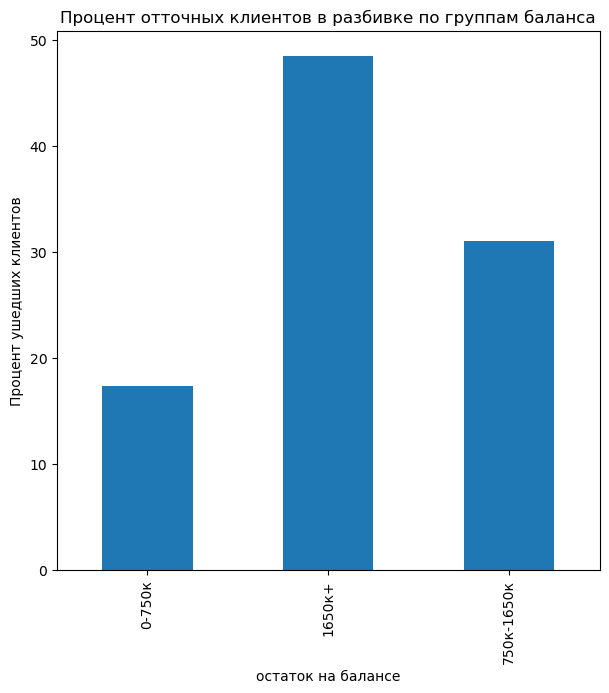

In [61]:
# Рассчитаем процент оттчоных клиентов в разбивке по  группам баланса от общего числа:
balance_churn = df.pivot_table (index = 'balance_group', values = 'churn', aggfunc =['sum', 'count'])
balance_churn.columns = balance_churn.columns.droplevel(level=1)
balance_churn ['perc'] = balance_churn['sum']/balance_churn['count']*100

# Построим столбчатую диаграмму:
balance_churn['perc'].plot (
    kind='bar', title = 'Процент отточных клиентов в разбивке по группам баланса',
    xlabel = 'остаток на балансе', ylabel = 'Процент ушедших клиентов', figsize = (7,7) 
    );
balance_churn.sort_values (by = ['perc'])

Из графика видим что клиенты категории премиум наиболее отточны

**Рассмотрим клиентов по группам дохода:**

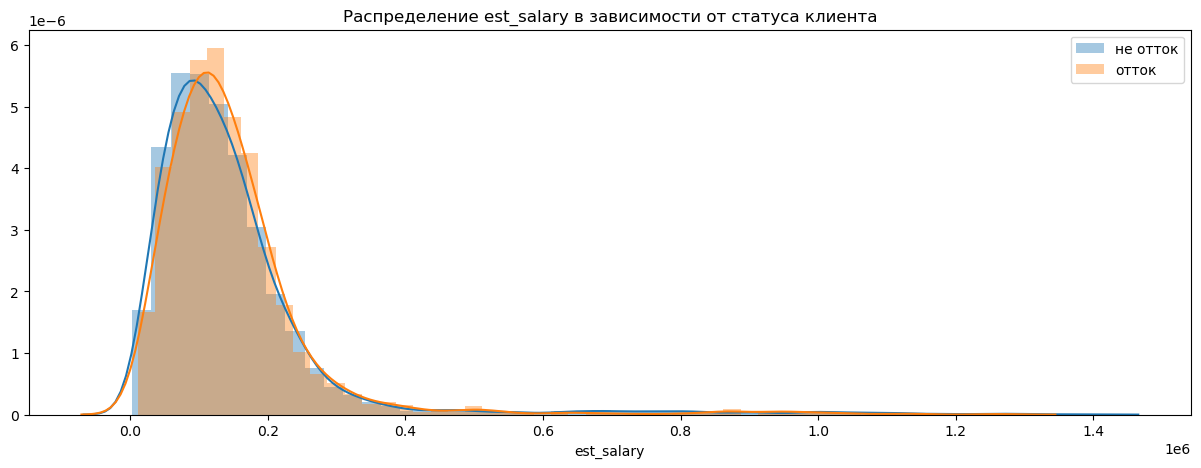

In [62]:
plt.figure(figsize=(15, 5))

sns.distplot(df[df['churn'] == 0]['est_salary'],  label = 'не отток')
sns.distplot(df[df['churn'] == 1]['est_salary'], label = 'отток')

plt.title('Распределение est_salary в зависимости от статуса клиента')
plt.xlabel('est_salary')
plt.ylabel('')
plt.legend()
plt.show()

In [63]:
# функция salary_group для категоризации клиентов по балансу:
def salary_group(est_salary):
    if 100000 >= est_salary >= 0:
        return '0-100к'
    if 260000 >= est_salary >= 100001:
        return '100к - 260к'
    if est_salary >= 260001:
        return '260к +'
     

In [64]:
# применим функцию salary_group и добавим новый столбец
df['salary_group'] = df['est_salary'].apply (salary_group)
display (df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yarolslavl,female,male,age_group,balance_group,salary_group
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0,1,0,22-35,0-750к,0-100к
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,0,1,0,1,0,36-48,750к-1650к,0-100к
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0,1,0,1,0,22-35,None,100к - 260к
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,1,1,0,49-62,750к-1650к,100к - 260к
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,0,0,1,0,1,22-35,0-750к,0-100к


,sum,count,perc
salary_group,,,
0-100к,624,3924,15.90
100к - 260к,1053,5246,20.07
260к +,141,803,17.56


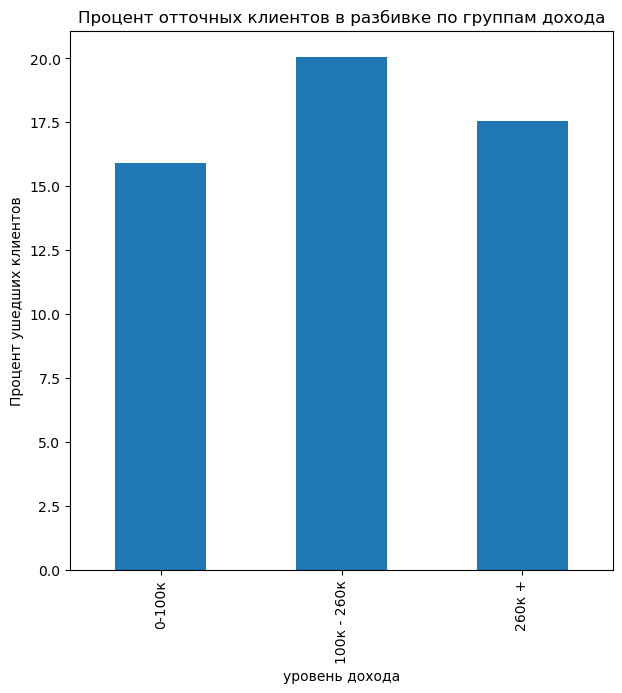

In [65]:
# Рассчитаем процент оттчоных клиентов в разбивке по  группам дохода от общего числа:
salary_churn = df.pivot_table (index = 'salary_group', values = 'churn', aggfunc =['sum', 'count'])
salary_churn.columns = salary_churn.columns.droplevel(level=1)
salary_churn ['perc'] = salary_churn['sum']/salary_churn['count']*100

# Построим столбчатую диаграмму:
salary_churn['perc'].plot (
    kind='bar', title = 'Процент отточных клиентов в разбивке по группам дохода',
    xlabel = 'уровень дохода', ylabel = 'Процент ушедших клиентов', figsize = (7,7) 
    );
salary_churn

Размер дохода не оказывает сильного влияния на отточность.

### Вывод

####  Показатели стратегически влияющие на отток:

По результатам анализа можно выделить показатели стратегически влияющие на отток. Процент оттока выше среднего (18%) мы наблюдаем:

- оценка объектов собственности клиента (столбец equity) -  
 отток от 21% для оценки 3 до 54% для оценки 9  
 
 
- скоринговый рейтинг клиента (столбец score) -  
в интервалах 820-950 клиенты более склонны к оттоку  


- количество продуктов, которыми пользуется клиент (столбец products) -  
 **4 продукта** - 63 % ушли из банка, с **5 продуктами** - 42%,  **2,3 продукта** доля отточных находится в диапазоне 19-29%  
 
 
- наличие кредитной карты (столбец credit_card) - 26% оттока без кредитки  


- активность пользователя (столбец last_activity) - 25% для активных  


- пол пользователя (столбцы female и male) - среди женщин доля отточных клиентов почти в два раз ниже, чем среди мужчин (24 %)  


- возраст (столбцы age) - 47 до 63 лет -23%, 26-46 лет - 19% оттока  


- баласовый остаток - доля клиентов с балансом 750к-1650к отточны на 31% более, с балансом 1650000+ отточны более чем на 48%

#### Портреты клиентов:  

По итогам исследования можно выделить общие портреты клиентов:

Клиент максимально склонен к оттоку:  

Мужчина  
Возраст 47 - 63  
Использует 3, 4, 5 продуктов  
Активный клиент  
Оценка объектов собственности клиента от 3  
Балл кредитного скоринга 820-950  
Не использует кредитную карту  
Остаток на балансе более 1650000


Клиент склонен остаться.  

Женщина  
Моложе 26  
Использует 1 продукт - кредитная карта  
Не активна  
Оценка объектов собственности 0  
  

## Проверка гипотез

### Проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Проверим данные на нормальность.

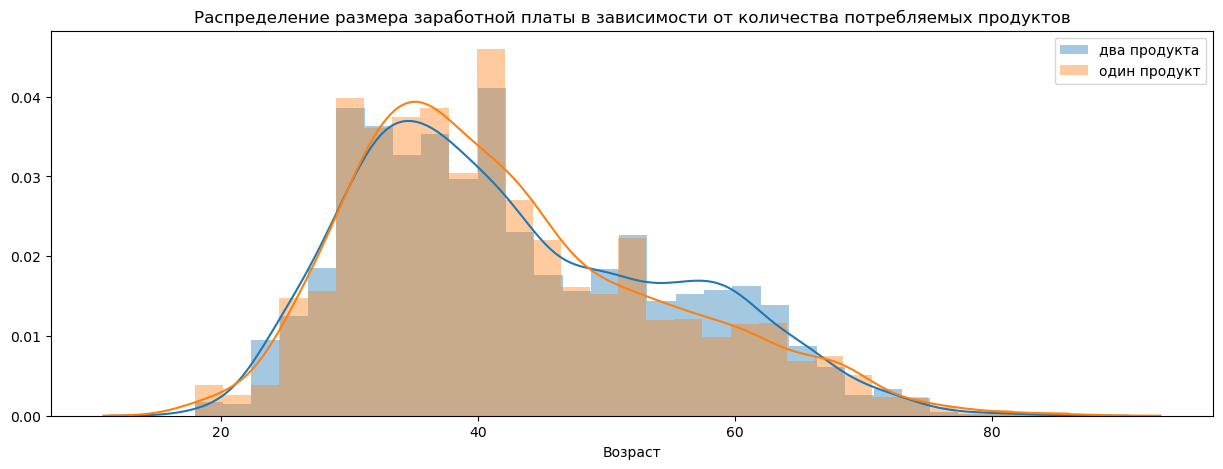

In [66]:
plt.figure(figsize=(15, 5))

sns.distplot(df[df['products'] == 2]['age'], label = 'два продукта')
sns.distplot(df[df['products'] < 2]['age'],  label = 'один продукт')

plt.title('Распределение размера заработной платы в зависимости от количества потребляемых продуктов')
plt.xlabel('Возраст')
plt.ylabel('')
plt.legend()
plt.show()

Данные распределены нормально.

In [67]:
alpha = .05
stat, p = st.levene(
    df.query('churn == 0')['age'], 
    df.query('churn == 1')['age']
)
print(f"p-значение:{p}")
if p < alpha:
    print("Дисперсии не равны")
else:
    print("Дисперсии равны")

p-значение:0.015851955302493944
Дисперсии не равны


Дисперсии выборок не равны, значит, при проведении t-теста дополнительно укажем это в параметре equal_var.

**Сформулируем гипотезы:**

- Н0 :статистически значимых различий в возрасте клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктами, нет

- Н1 : статистически значимые различия в возрасте клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктам, есть

Уровень значимости зададим обычный: 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Мы помним, что количество пользователей одного и двух продуктов сопоставимо.

Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind.

Если p-value будет меньше выбранного уровня значимости 
, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [68]:
alpha = 0.05   # критический уровень статистической значимости    
results = st.stats.ttest_ind(df[df['products'] == 2]['age'], 
                             df[df['products'] < 2]['age'],
                             equal_var=False)

print('p-значение: ', results.pvalue)    # тест двухсторонний

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.03299080704232691
Отвергаем нулевую гипотезу


#### Вывод 

Отвергаем нулевую гипотезу, статистически значимые различия в возрасте клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктам, есть

### Проверка гипотезы о различие в скоринговых баллах действующих и ушедших клиентов банка.

Проверим данные на нормальность:

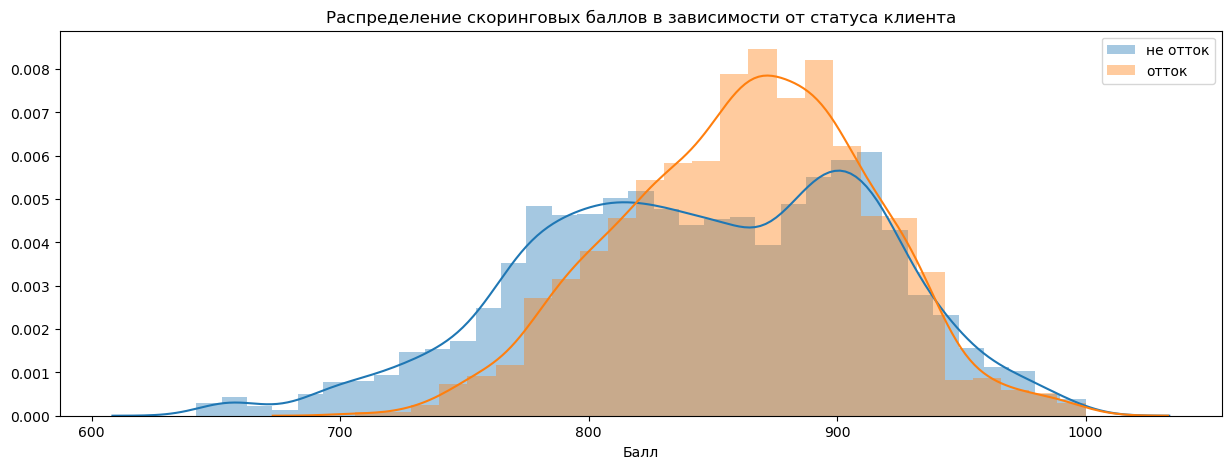

In [69]:
plt.figure(figsize=(15, 5))

sns.distplot(df[df['churn'] == 0]['score'],  label = 'не отток')
sns.distplot(df[df['churn'] == 1]['score'], label = 'отток')

plt.title('Распределение скоринговых баллов в зависимости от статуса клиента')
plt.xlabel('Балл')
plt.ylabel('')
plt.legend()
plt.show()

Данные распределены не нормально.

In [70]:
alpha = .05
stat, p = st.levene(
    df.query('churn == 0')['score'], 
    df.query('churn == 1')['score']
)
print(f"p-значение:{p}")
if p < alpha:
    print("Дисперсии не равны")
else:
    print("Дисперсии равны")

p-значение:1.0003991890742234e-67
Дисперсии не равны


Дисперсии выборок не равны, значит, при проведении t-теста дополнительно укажем это в параметре equal_var.

**Сформулируем гипотезы:**

- Н0 :статистически значимых различий в баллах скоринга у клиентов которые попали в отток и удействующих клиентов нет

- Н1 :статистически значимые различия в баллах скоринга у клиентов которые попали в отток и удействующих клиентов есть

Уровень значимости так же зададим обычный: 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Мы помним, что количество пользователей одного и двух продуктов сопоставимо.

Так же мы будем использовать параметр equal_var=False, т.к. дисперсии не равны.

Если p-value будет меньше выбранного уровня значимости 0.05 
, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [71]:
alpha = 0.05   # критический уровень статистической значимости   

results = st.stats.ttest_ind(data[data['churn'] == 0]['score'], 
                             data[data['churn'] == 1]['score'],
                             equal_var=False)

print('p-значение: ', results.pvalue)    # тест двухсторонний

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2043086927657869e-37
Отвергаем нулевую гипотезу


#### Вывод

Отвергаем нулевую гипотезу: статистически значимые различия в баллах скоринга у клиентов которые попали в отток и у действующих клиентов есть

## Сегментация пользователей

По итогам проведенного анализа и проверки гипотез выделим несколько высокоотточных сегментов пользователей.  

В качестве критериев для выделения выберем самым отточные интервалы следующих признаков стратегически влияющих на отток:  
- гендерная принадлежность  
- количество используемых продуктов 
- оценка объектов собственности  
- возраст 
 

### Сегмент №1  по гендерной принадлежности клиента

Т.к. сегмент просто по гендеру слишком велик для обработки маркетингом, добавим еще один высокотточный признак - отсутствие кредитной карты:

In [72]:
total=df.query('male==1 and credit_card==0')
churn = total.query('churn==1')

total_=len(total)
churn_=len(churn)

# Рассчитаем общее число пользователей в этом сегменте:
print('Общее число пользователей в сегменте №1:', total_)

# Рассчитаем число отточных пользователей в этом сегменте:
print('Число отточных пользователей в сегменте №1:', churn_)

#  Рассчитаем долю отточных пользователей:
print('Доля отточных пользователей в сегменте №1:', round(churn_ / total_*100), '%')

Общее число пользователей в сегменте №1: 1303
Число отточных пользователей в сегменте №1: 457
Доля отточных пользователей в сегменте №1: 35 %


### Сегмент №2  по количествуу используемых продуктов

In [73]:
total=df.query('products >= 3')
churn = total.query('churn==1')

total_=len(total)
churn_=len(churn)

# Рассчитаем общее число пользователей в этом сегменте:
print('Общее число пользователей в сегменте №2:', total_)

# Рассчитаем число отточных пользователей в этом сегменте:
print('Число отточных пользователей в сегменте №2:', churn_)

#  Рассчитаем долю отточных пользователей:
print('Доля отточных пользователей в сегменте №2:', round(churn_ / total_*100),'%')

Общее число пользователей в сегменте №2: 1531
Число отточных пользователей в сегменте №2: 605
Доля отточных пользователей в сегменте №2: 40 %


### Сегмент №3 по оценке собственности клиента 

In [74]:
total=df.query('equity>=5')
churn = total.query('churn==1')

total_=len(total)
churn_=len(churn)

# Рассчитаем общее число пользователей в этом сегменте:
print('Общее число пользователей в сегменте №3:', total_)

# Рассчитаем число отточных пользователей в этом сегменте:
print('Число отточных пользователей в сегменте №3:', churn_)

#  Рассчитаем долю отточных пользователей:
print('Доля отточных пользователей в сегменте №3:', round(churn_ / total_*100),'%')

Общее число пользователей в сегменте №3: 2186
Число отточных пользователей в сегменте №3: 684
Доля отточных пользователей в сегменте №3: 31 %


### Сегмент №4 по возрасту клиента

In [75]:
total=df.query('age>=47 and age<=63')
churn = total.query('churn==1')

total_=len(total)
churn_=len(churn)

# Рассчитаем общее число пользователей в этом сегменте:
print('Общее число пользователей в сегменте №4:', total_)

# Рассчитаем число отточных пользователей в этом сегменте:
print('Число отточных пользователей в сегменте №4:', churn_)

#  Рассчитаем долю отточных пользователей:
print('Доля отточных пользователей в сегменте №4:', round(churn_ / total_*100),'%')

Общее число пользователей в сегменте №4: 2653
Число отточных пользователей в сегменте №4: 584
Доля отточных пользователей в сегменте №4: 22 %


### Сегмент №5 по балансу

In [76]:
total=df.query(' balance >= 1650001')
churn = total.query('churn==1')

total_=len(total)
churn_=len(churn)

# Рассчитаем общее число пользователей в этом сегменте:
print('Общее число пользователей в сегменте №4:', total_)

# Рассчитаем число отточных пользователей в этом сегменте:
print('Число отточных пользователей в сегменте №4:', churn_)

#  Рассчитаем долю отточных пользователей:
print('Доля отточных пользователей в сегменте №4:', round(churn_ / total_*100),'%')

Общее число пользователей в сегменте №4: 599
Число отточных пользователей в сегменте №4: 290
Доля отточных пользователей в сегменте №4: 48 %


### Сегмент №6 по гендеру (неотточный)

Женщина  
Использует 1 продукт - кредитная карта

In [77]:
total=df.query('male==0 and credit_card==1')
churn = total.query('churn==1')

total_=len(total)
churn_=len(churn)

# Рассчитаем общее число пользователей в этом сегменте:
print('Общее число пользователей в сегменте №1:', total_)

# Рассчитаем число отточных пользователей в этом сегменте:
print('Число отточных пользователей в сегменте №1:', churn_)

#  Рассчитаем долю отточных пользователей:
print('Доля отточных пользователей в сегменте №1:', round(churn_ / total_*100), '%')

Общее число пользователей в сегменте №1: 3096
Число отточных пользователей в сегменте №1: 277
Доля отточных пользователей в сегменте №1: 9 %


### Сегмент №7 по количеству используемых продуктов (неотточный)

In [78]:
total=df.query('products < 2')
churn = total.query('churn==1')

total_=len(total)
churn_=len(churn)

# Рассчитаем общее число пользователей в этом сегменте:
print('Общее число пользователей в сегменте №2:', total_)

# Рассчитаем число отточных пользователей в этом сегменте:
print('Число отточных пользователей в сегменте №2:', churn_)

#  Рассчитаем долю отточных пользователей:
print('Доля отточных пользователей в сегменте №2:', round(churn_ / total_*100),'%')

Общее число пользователей в сегменте №2: 3323
Число отточных пользователей в сегменте №2: 235
Доля отточных пользователей в сегменте №2: 7 %


### Сегмент №8 по оценке собственности клиента (неотточный)

In [80]:
total=df.query('equity<3')
churn = total.query('churn==1')

total_=len(total)
churn_=len(churn)

# Рассчитаем общее число пользователей в этом сегменте:
print('Общее число пользователей в сегменте №3:', total_)

# Рассчитаем число отточных пользователей в этом сегменте:
print('Число отточных пользователей в сегменте №3:', churn_)

#  Рассчитаем долю отточных пользователей:
print('Доля отточных пользователей в сегменте №3:', round(churn_ / total_*100),'%')

Общее число пользователей в сегменте №3: 4400
Число отточных пользователей в сегменте №3: 349
Доля отточных пользователей в сегменте №3: 8 %


## Выводы и рекомендации

Представленные для анализа данные содержат информацию о 10000 клиентах банка и признаках, характеризующих их поведение.  

**В процессе предварительной обработки данных:**  

- наименования столбцов приведены к общему стилю
- проведена замена значений поля gender с "М" на 1 и с "Ж" на 0
- т.к. пропусков менее 1 % удалены строки с пропусками в поле age
- пропуски данных поля balance заменены на "0"
- удалены строки с аномалиями в столбце 'est_salary' и balance  


**По итогам исследования выделили следующие характерные портреты клиентов:**

*Клиент максимально склонен к оттоку:*  

Мужчина  
Возраст 47 - 63  
Использует 3, 4, 5 продуктов  
Активный клиент  
Оценка объектов собственности клиента от 3  
Балл кредитного скоринга 820-950  
Не использует кредитную карту  
Остаток на балансе более 1650000  


*Клиент склонен остаться*  

Женщина  
Моложе 26  
Использует 1 продукт - кредитная карта  
Не активна  
Оценка объектов собственности 0    

**Проверили две гипотезы:**

 1. Гипотеза о статистически значимых различиях в возрасте клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктам, подтвердилась.

 2. Гипотеза о статистически значимые различия в баллах скоринга у клиентов которые попали в отток и удействующих клиентов так же подтвердилась.  
 
**Сегменты по приоритету и рекомендации к ним:**  

- Сегмент №5 по балансу. Клиенты имеющие очень высокие балансовые остатки, более 1650000  

Общее число пользователей в сегменте №4: 599  
Число отточных пользователей в сегменте №4: 290  
Доля отточных пользователей в сегменте №4: 48 %  

Рекомендации:  
Предложить специальные условия по процентам на вклад

- Сегмент №2. Клиенты имеющие 3 и более продуктов банка   

Общее число пользователей в сегменте №2: 1531  
Число отточных пользователей в сегменте №2: 605  
Доля отточных пользователей в сегменте №2: 40 %  

Рекомендации:  
Поскольку самые отточные - это клиенты с 3, 4 и 5 продуктами- нужно обратить внимание при переходе клиента со 2 на 3 продукт для выяснения неудовлетворенности получаемыми ранее услугами. 

- Сегмент №1. Клиенты мужчины без кредитной карты  

Общее число пользователей в сегменте №1: 1303  
Число отточных пользователей в сегменте №1: 457  
Доля отточных пользователей в сегменте №1: 35 %  

Рекомендации:  
предложить оформить кредитную карту по спец условиям
предложить кешбэк на категории мужских товаров (автотовары, топливо, рыбалка и туризм)


- Сегмент №3. Клиенты с оценкой собственности 5 и более 

Общее число пользователей в сегменте №3: 2186  
Число отточных пользователей в сегменте №3: 684  
Доля отточных пользователей в сегменте №3: 31 %  

Рекомендации:  
предложить специальные условия по страхованию объектов собственности  


- Сегмент №4. Клиенты возрастной группы 47-63  

Общее число пользователей в сегменте №4: 2653  
Число отточных пользователей в сегменте №4: 584  
Доля отточных пользователей в сегменте №4: 22 %  

Рекомендации:  
Это состоявшийся профессионально и более внимательный к мелочам контингент с хорошим доходом, который уйдет туда, где посчитает условия более подходящими. Можно попробовать заинтересовать ранней инвестиционной пенсионной программой, целевыми кредитами.


